In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import sklearn.cluster as cluster
from scipy import stats

In [2]:
def read_file(filename):
    '''
    Returns two dataframes one with country as columns and the other with years as columns
    '''
    df = pd.read_excel(filename,skiprows=3)
    labels = ['Country Code', 'Indicator Name']
    y_df = df.set_index('Country Name').drop(labels=labels,axis=1)
    c_df = y_df.transpose()
    return y_df, c_df

In [3]:
def normalize(v):
    '''
    normalizes the data between 1 and 0
    '''
    return (v - v.min()) / (v.max() - v.min())

In [4]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   

In [5]:
def make_clusters(series1,series2,n_clusters=3,column_names=None):
    '''
    Plots clusters of the data given
    '''
    df  = pd.concat([series1, series2], axis=1,keys=column_names)
    df = df.dropna()
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    
    km = cluster.KMeans(n_clusters=n_clusters)
    
    x = df[column_names[0]].values.reshape(-1, 1)
    y = df[column_names[1]].values
    
    km.fit(normalize(x),normalize(y))
    labels = km.labels_
    
    col = ["orange","green","red","blue","black"]
    for l in range(n_clusters):
        plt.plot(x[labels==l], y[labels==l], "o", markersize=6, color=col[l])
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])    
    plt.show()

In [6]:
co1,co2 = read_file('API_EN.ATM.GHGT.KT.CE_DS2_en_excel_v2_4026021.xls')

In [7]:
pop1,pop2 = read_file('API_SP.POP.GROW_DS2_en_excel_v2_4007664.xls')

In [8]:
eng1,eng2 = read_file('API_EG.USE.PCAP.KG.OE_DS2_en_excel_v2_4027677.xls')

In [9]:
gdp1,gdp2 = read_file('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_4021477.xls')

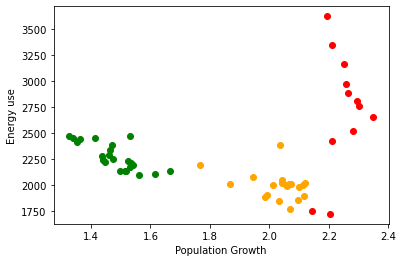

In [10]:
make_clusters(pop1.mean(numeric_only=True), eng1.mean(numeric_only=True),n_clusters=3,column_names=['Population Growth', 'Energy use'])

The plot shows the relationship between population growth percentage and energy use. It can be seen that years with growing population on average have a lower energy use. However once the growth rate goes higher than around 2.1% the energy use increases dramatically as shown by the blue cluster.

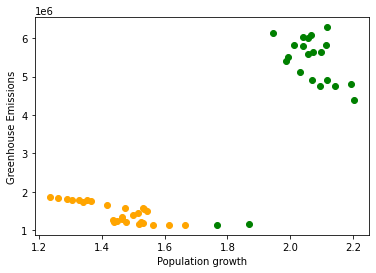

In [11]:
make_clusters(pop1.mean(numeric_only=True), co1.mean(numeric_only=True),n_clusters=2,column_names=['Population growth', 'Greenhouse Emissions'])

The plot shows greenhouse gases and population growth clusters. Two distict clusters are formed. The clusters show that a group of coutries having a growth rate of higher than two emit a lot of greenhouse gases and countries with less growth have less emissions as expected

In [12]:
def linfunc(x, a, b):
    """ Function for fitting
        x: independent variable
        a, b: parameters to be fitted
    """
    
    y = a*x + b
    
    return y

In [13]:
def fit_data(func, x_values,y_values,p0=None,error=True,xlabel = None,ylabel=None):
    popt, pcov = curve_fit(func, x_values, y_values,p0=p0)
    y_pred = func(x_values,*popt)
    
    plt.plot(x_values,y_pred)
    plt.plot(x_values,y_values,'ro')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(['Predicted', 'Original'])
    sigma = np.sqrt(np.diag(pcov))
    
    low, up = err_ranges(x_values, func, popt, sigma)
    
    if error:
        plt.fill_between(x_values, low, up, color="Red", alpha=0.1)
    plt.show()

In [14]:
mor1,mor2 = read_file('API_SH.DYN.MORT_DS2_en_excel_v2_4030824.xls')

In [15]:
enr1,enr2 = read_file('API_SE.ENR.PRSC.FM.ZS_DS2_en_excel_v2_4033821.xls')

In [16]:
df = pd.concat([gdp1.mean(numeric_only=True), mor1.mean(numeric_only=True)], axis=1).dropna()
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [17]:
x_values = df[0].values
y_values = df[1].values

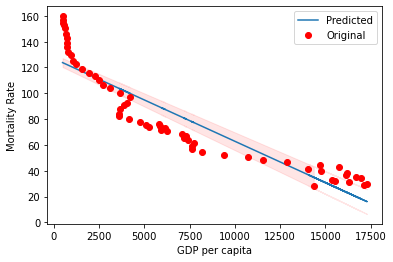

In [18]:
fit_data(linfunc,x_values,y_values,xlabel="GDP per capita",ylabel="Mortality Rate")

In [20]:
df = pd.concat([gdp1.mean(numeric_only=True), enr1.mean(numeric_only=True)], axis=1).dropna()
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [21]:
x_values = df[0].values
y_values = df[1].values

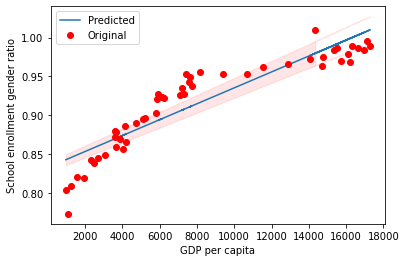

In [22]:
fit_data(linfunc,x_values,y_values,xlabel="GDP per capita",ylabel="School enrollment gender ratio")